**Assingment regresion**

Importing the  library

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Read the cars dataset.


In [3]:
dataset = pd.read_csv('D:\M-8 machine learning\Basic machine\jj\car data (1).csv')

#  Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, etc if any.

understand the data

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
dataset.shape

(301, 9)

In [6]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
len(dataset.columns)

9

Finding the null values

In [9]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Finding the duplicate values

In [10]:

dataset.duplicated().sum()

2

In [11]:
# here we drop the duplicate values
dataset.drop_duplicates(inplace=True)

In [12]:
dataset.shape # checking the shape of the data after droping the some duplicate values

(299, 9)

# Plot  the some graph here to understand  the behaviour of our dataset

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

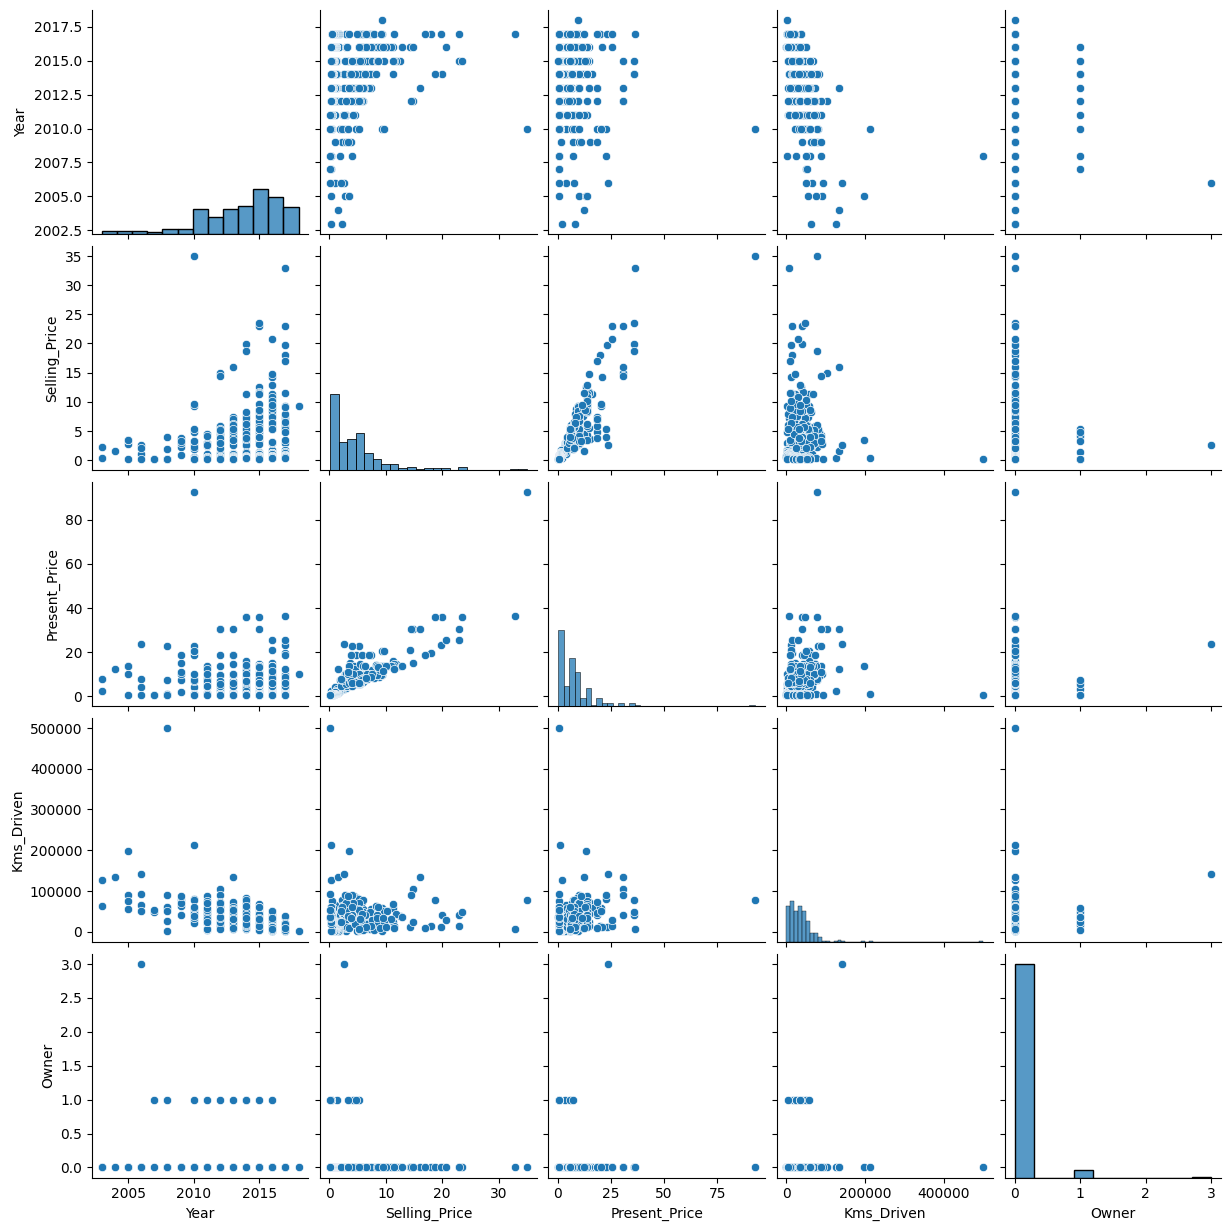

In [14]:
sns.pairplot(dataset)

<Figure size 1500x500 with 0 Axes>

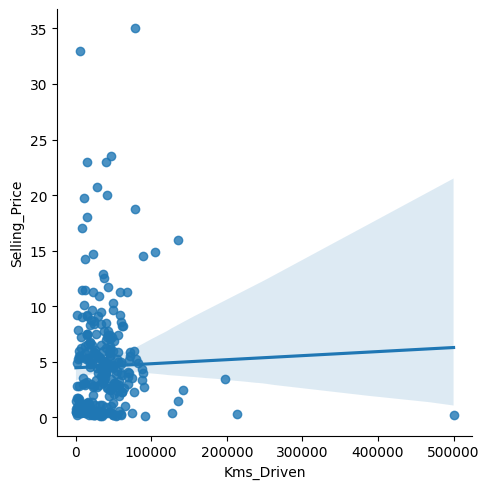

In [13]:
plt.figure(figsize=(15,5)) # here we ploting the graph for finding the relation ship between kms_driven and selling price
sns.lmplot(data=dataset,x= 'Kms_Driven',y='Selling_Price')
plt.show()

If your car kms_driven is low the you get the high price

<Figure size 1500x500 with 0 Axes>

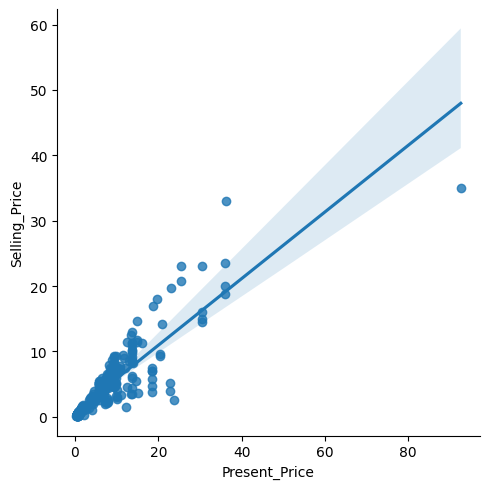

In [261]:
plt.figure(figsize=(15,5)) # here we creating the  graph between selling price and persent price
sns.lmplot(data=dataset,x= 'Present_Price',y='Selling_Price')
plt.show()

it showing the linear graph between the present price and selling price

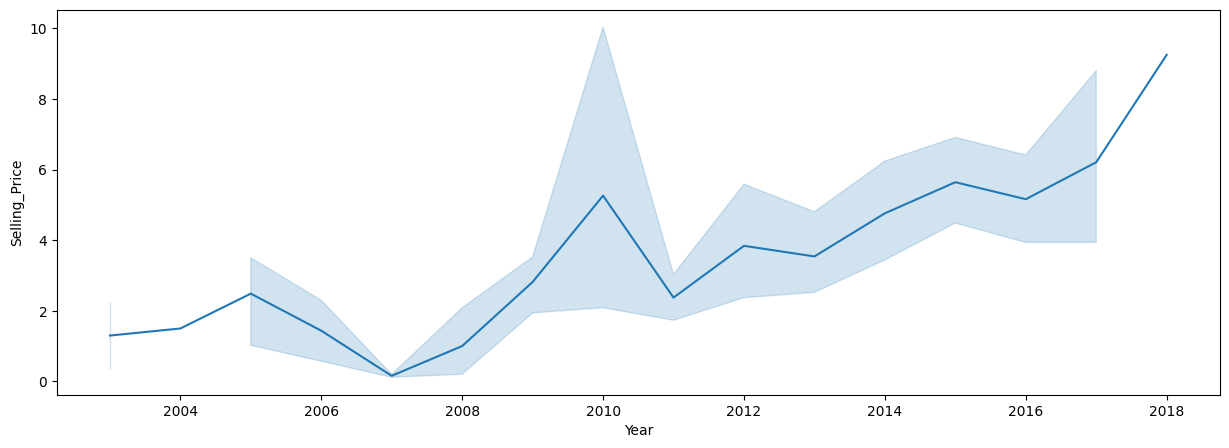

In [262]:
plt.figure(figsize=(15,5))# here we creating the graph between year and selling price
sns.lineplot(data=dataset,x= 'Year',y='Selling_Price')
plt.show()

 this graph showing the increment in the price year by year

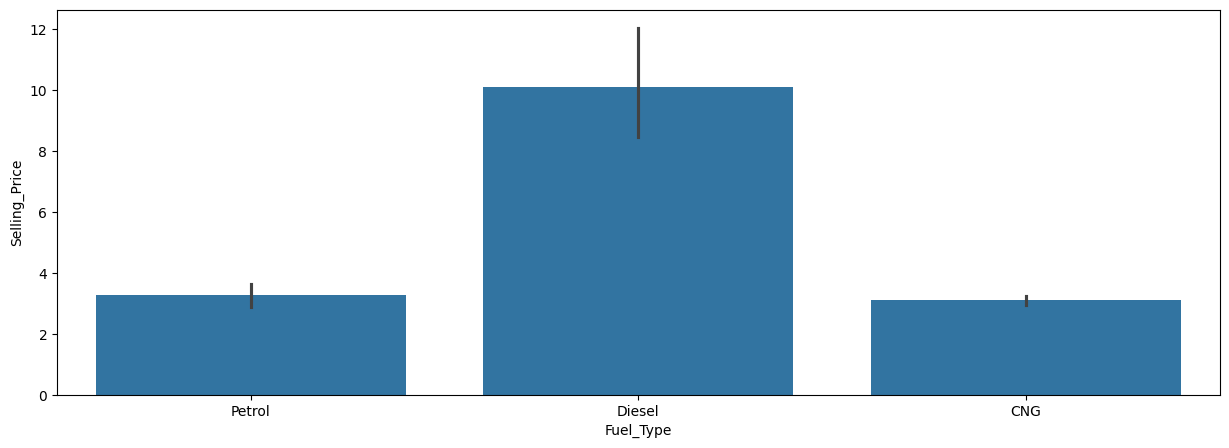

In [263]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset,x= 'Fuel_Type',y='Selling_Price')
plt.show()

This graph showing the diesel fuel type car geting more  price  as compair to other

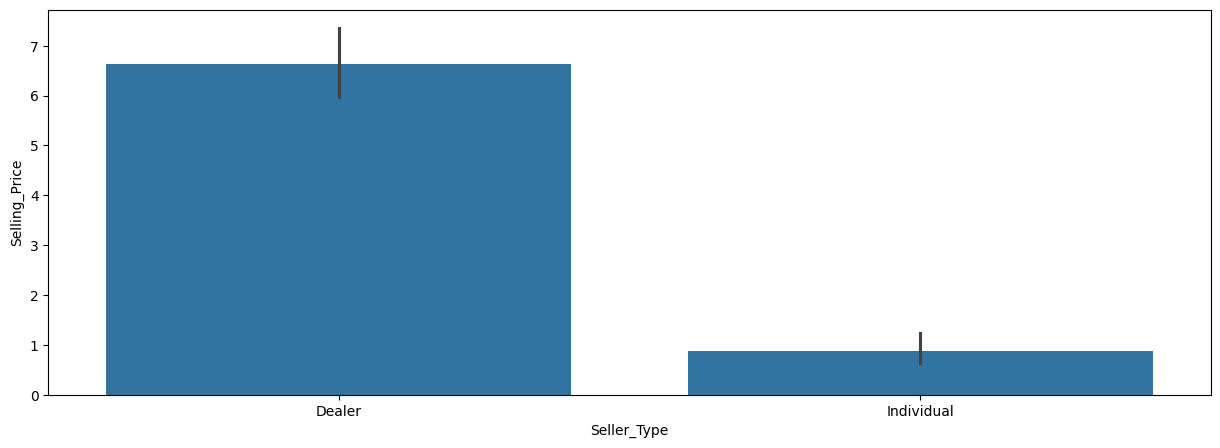

In [264]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset,x= 'Seller_Type',y='Selling_Price')
plt.show()

 this graph showing the dealer get higher price as compair to individual

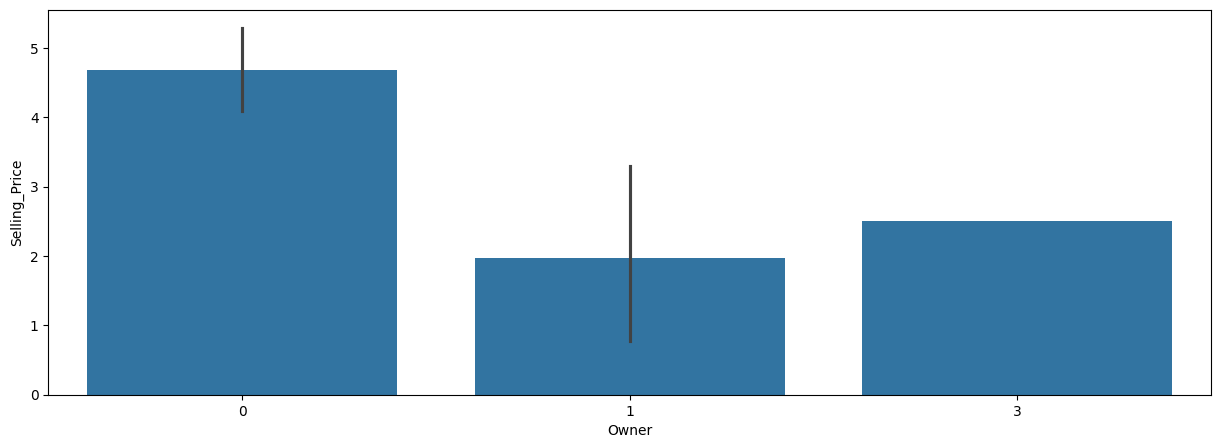

In [265]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, x = 'Owner',y='Selling_Price')
plt.show()

This graph showing the whichtype of owner getting the more price here first owner getting the higer price as comapair to other

In [266]:
dataset.Owner.unique()

array([0, 1, 3])

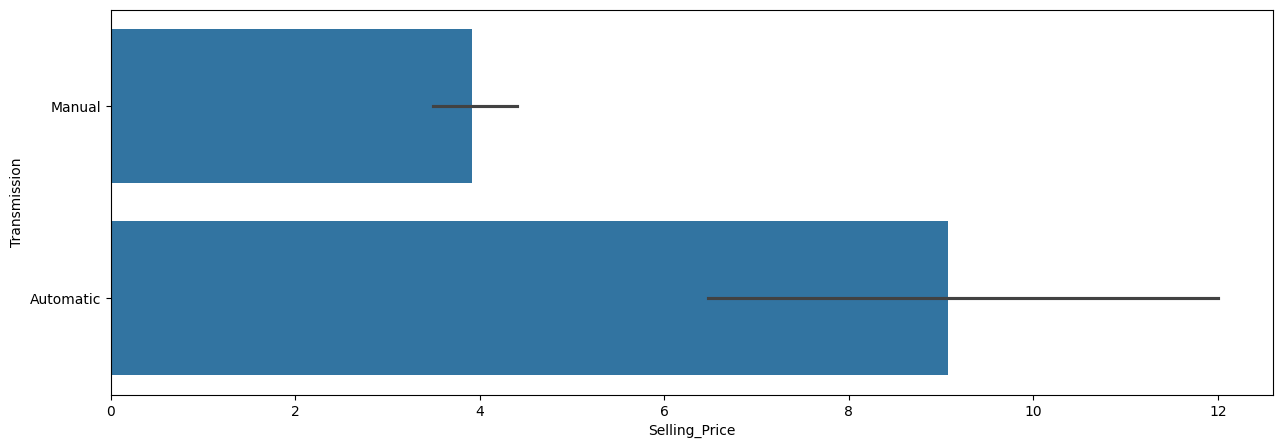

In [267]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'Transmission',x='Selling_Price')
plt.show()

This graph showing the automatic car geting the higher price as compaur to the other

# Spliting the data into the  X and y

In [268]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
x = dataset.drop(['Car_Name','Selling_Price'], axis=1) # here X is a independent variable
x.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0
1,2013,9.54,43000,Diesel,Dealer,Manual,0
2,2017,9.85,6900,Petrol,Dealer,Manual,0
3,2011,4.15,5200,Petrol,Dealer,Manual,0
4,2014,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
y=dataset.iloc[0:297,2] # here y is dependent variable
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

# Transform the categorical data.


In [17]:
print(y.shape)
print(x.shape)

(297,)
(299, 7)


In [18]:
# Separating the numerical and categorical columns
def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(x)

print(numerical)
print(categorical)



['Year', 'Present_Price', 'Kms_Driven', 'Owner']
['Fuel_Type', 'Seller_Type', 'Transmission']


In [19]:
cat_column=x[categorical].columns # here we store the array of column in to the variable

In [20]:
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32) # here we using the onehote encoder to convert the numerical data into the categorical


In [21]:
X_new = ohe.fit_transform(x[cat_column])
X_new
# x_new is a array  of transform version of the all categorical data

array([[0, 1, 0, 1],
       [1, 0, 0, 1],
       [0, 1, 0, 1],
       ...,
       [0, 1, 0, 1],
       [1, 0, 0, 1],
       [0, 1, 0, 1]])

In [22]:
ohe.get_feature_names_out()

array(['Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'], dtype=object)

In [23]:
# prompt: how to marge  x_new and x[numericl]

import pandas as pd

# Convert X_new to a DataFrame
X_new_df = pd.DataFrame(X_new, columns=ohe.get_feature_names_out())

# Concatenate X_new_df and x[numerical]
x_final = pd.concat([x[numerical], X_new_df], axis=1)

print(x_final.head())


     Year  Present_Price  Kms_Driven  Owner  Fuel_Type_Diesel  \
0  2014.0           5.59     27000.0    0.0               0.0   
1  2013.0           9.54     43000.0    0.0               1.0   
2  2017.0           9.85      6900.0    0.0               0.0   
3  2011.0           4.15      5200.0    0.0               0.0   
4  2014.0           6.87     42450.0    0.0               1.0   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0               1.0                     0.0                  1.0  
1               0.0                     0.0                  1.0  
2               1.0                     0.0                  1.0  
3               1.0                     0.0                  1.0  
4               0.0                     0.0                  1.0  


In [24]:
R=x_final.dropna()

In [25]:
R.isna().sum()

Year                      0
Present_Price             0
Kms_Driven                0
Owner                     0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
dtype: int64

In [26]:

R.shape

(297, 8)

# Train the Data into the train test splite

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(R,y,test_size=0.3)

# Select the model and train the model

In [28]:
from sklearn.linear_model import LinearRegression

# Fitting the model
regressor_ini = LinearRegression()
regressor_ini.fit(x_train, y_train)



LinearRegression()

# printing the result

In [29]:
y_pred=regressor_ini.predict(x_test)
y_pred

array([ 2.06803668, -1.01641919,  8.82843499,  5.34876167,  2.3169406 ,
       15.7773449 ,  6.33247772,  1.90022492,  8.3481345 ,  1.57115185,
       -0.13063255,  2.95154762,  9.24710053,  8.21872095,  6.38693829,
        1.69502364,  1.60537295,  3.28498752,  1.85528049,  6.20050467,
       -2.43570616,  2.19367696,  4.75918882,  3.04268121,  0.47609048,
        1.4149843 ,  3.3436381 ,  4.29510467,  7.6962558 ,  1.08263399,
       -1.25510608,  1.85923928,  1.00836905, 13.15842343,  0.29626603,
        0.08170904,  5.39776318, 10.92533187,  9.1562854 , 16.22677701,
        6.51922831,  7.88561594,  8.04806028, -1.47332961,  2.54743349,
        6.83992366,  6.11635272,  0.76746891,  4.95572199,  4.44488934,
        8.3651246 ,  1.86559163,  4.2300018 ,  6.00710829, -1.70076435,
        2.37524763, 12.1755028 ,  2.06559748,  8.32690116,  5.91132281,
       11.53052853,  5.57791842, -0.03255721,  2.0002396 , -0.01948603,
        0.58868282,  5.8882357 ,  2.02935788,  2.22836148,  0.60

In [30]:
model=regressor_ini

In [31]:
model.coef_

array([ 4.80627042e-01,  4.76555414e-01,  1.10872496e-06,  3.61719448e-01,
        6.10020197e-01, -2.50435033e-01, -1.18908833e+00, -2.65487665e-01])

In [32]:
R.shape

(297, 8)

# Get the feature importance


In [33]:
# Get the feature importance
feature_importance = pd.Series(model.coef_, index=R.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
Fuel_Type_Diesel          0.610020
Year                      0.480627
Present_Price             0.476555
Owner                     0.361719
Kms_Driven                0.000001
Fuel_Type_Petrol         -0.250435
Transmission_Manual      -0.265488
Seller_Type_Individual   -1.189088
dtype: float64


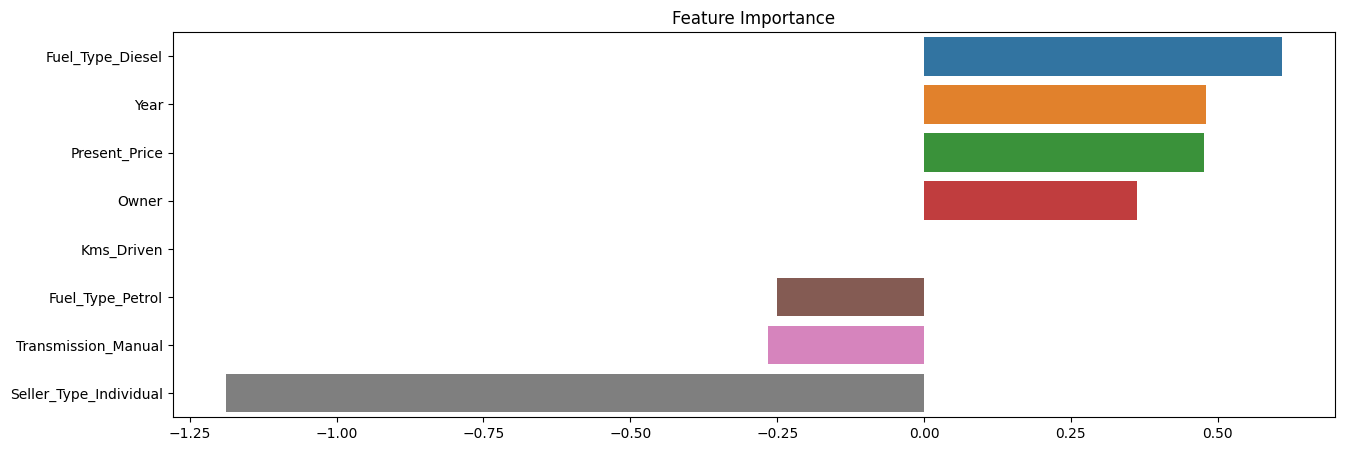

In [34]:

# Create a bar plot of the feature importance
plt.figure(figsize=(15,5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()


In [87]:
r_squared_M= r2_score(y_test, y_pred)

r_squared_M

0.8068314627749381

# finding the sum squar error (sse)

In [88]:
rmse_linear = (mean_squared_error(y_test, y_pred))
rmse_linear

3.572895879441091

# Multilinear (SSE)

In [89]:
sse = np.sum((y_test - y_pred)**2)
print(f"Multiliear:")
print(sse)
print('SSE of multilinear is less then 800')

Multiliear:
321.5606291496982
SSE of multilinear is less then 800


# Ridge regression

In [90]:
redg=Ridge(.1)
mode_1=redg.fit(x_train,y_train)

In [91]:
yp=mode_1.predict(x_test)

In [92]:
mode_1.coef_

array([ 4.80524973e-01,  4.76631229e-01,  1.10549247e-06,  3.56481333e-01,
        5.78762906e-01, -2.81081558e-01, -1.18574090e+00, -2.64692351e-01])

In [93]:
r_squared_R= r2_score(y_test, yp)
r_squared_R

0.8070284063576205

In [94]:
rmse_linear_R= (mean_squared_error(y_test, yp))


In [95]:
sse_R= np.sum((y_test - yp)**2)
print(f"Ridge:")
print(sse_R)

Ridge:
321.2327843398544


# LASSO

In [96]:
Lasso_Regression=Lasso(.01)
model_2=Lasso_Regression.fit(x_train,y_train)

In [97]:
lp=model_2.predict(x_test)

In [98]:
r_squared_L= r2_score(y_test, lp)
r_squared_L

0.8155007391000695

In [99]:
model_2.coef_

array([ 4.75602155e-01,  4.77808258e-01,  1.00257717e-06,  5.72773298e-02,
        5.78116912e-01, -2.34168673e-01, -1.14413082e+00, -1.91394008e-01])

In [100]:
rmse_linear_L= (mean_squared_error(y_test, lp))
rmse_linear_L

3.4125466729670078

In [101]:
sse_L= np.sum((y_test - lp)**2)
print(f"Lasso:")
print(sse_L)

Lasso:
307.1292005670307


# Elasticnet

In [102]:
ElasticNet_Regression=ElasticNet(.1)
model_3=ElasticNet_Regression.fit(x_train ,y_train )


In [103]:
Ep=model_3.predict(x_test)

In [104]:
r_squared_E= r2_score(y_test, Ep)
r_squared_E

0.8196686722836429

In [105]:
rmse_linear_E = (mean_squared_error(y_test, Ep))
rmse_linear_E

3.3354554887022276

In [106]:
sse_E= np.sum((y_test - Ep)**2)
print(f"Elasticnet:")
print(sse_E)

Elasticnet:
300.1909939832005


# Compare all the models using the Sum of Squared Error metric


In [170]:
SSE_all=[['mulltilinear',sse],['Ridge',sse_R],['lasso',sse_L],['Elasti',sse_E]]

In [171]:
r_2_all=[['mulltilinear',r_squared_M],['Ridge',r_squared_R],['lasso',r_squared_L],['Elasti',r_squared_E]]

In [172]:
# Convert lists to DataFrames
df_sse = pd.DataFrame(SSE_all, columns=['Model', 'SSE'])
df_r2 = pd.DataFrame(r_2_all, columns=['Model', 'R-squared'])

In [173]:
# Merge DataFrames on 'Model' column
df = pd.merge(df_sse, df_r2, on='Model')

# Display DataFrame
df

,Model,SSE,R-squared
0,mulltilinear,321.560629,0.806831
1,Ridge,321.232784,0.807028
2,lasso,307.129201,0.815501
3,Elasti,300.190994,0.819669


In [174]:
df2=df.set_index('Model') # converting the model into the index
df2

,SSE,R-squared
Model,,
mulltilinear,321.560629,0.806831
Ridge,321.232784,0.807028
lasso,307.129201,0.815501
Elasti,300.190994,0.819669


# Calculating the Residual

In [175]:
predictions = regressor_ini.predict(x_test)
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

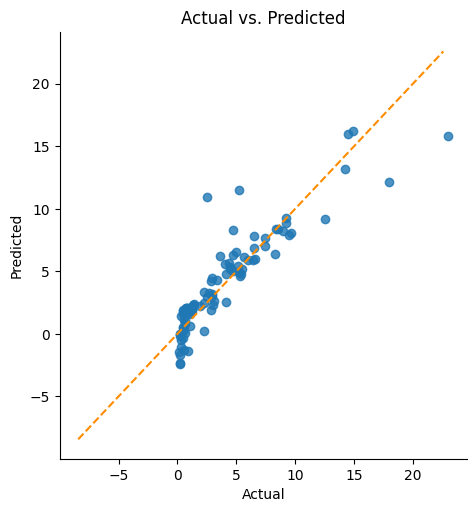

In [176]:
# Plotting the diagonal  df_results
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)
line_coords = np.arange(df_results.min().min(), df_results.max().max())
plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


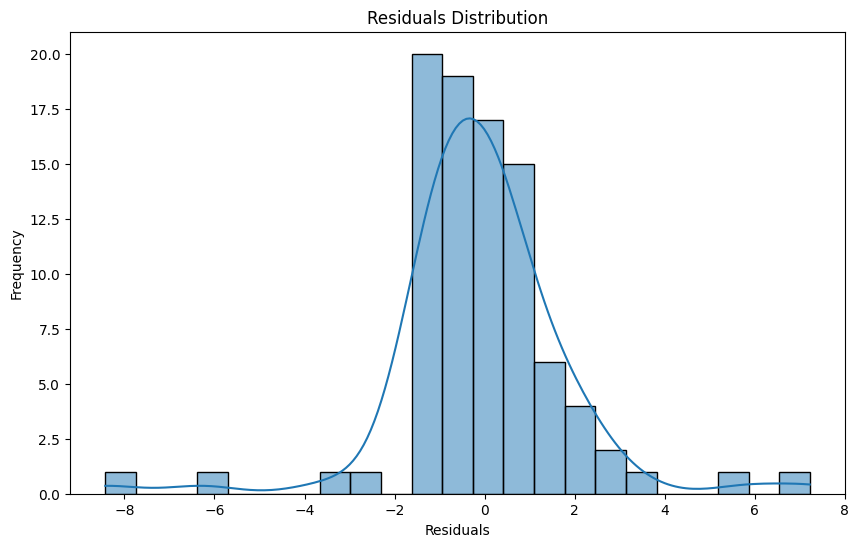

In [177]:
# Visualize the diagnostic plots
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [178]:
r2=df['R-squared']


# Calculating Adjust R^2

In [179]:
df

,Model,SSE,R-squared
0,mulltilinear,321.560629,0.806831
1,Ridge,321.232784,0.807028
2,lasso,307.129201,0.815501
3,Elasti,300.190994,0.819669


In [180]:
df['Adjust_R2'] = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)


In [181]:
df

,Model,SSE,R-squared,Adjust_R2
0,mulltilinear,321.560629,0.806831,0.787753
1,Ridge,321.232784,0.807028,0.787969
2,lasso,307.129201,0.815501,0.797279
3,Elasti,300.190994,0.819669,0.801858


In [143]:
df_results.head()

,Actual,Predicted,Residuals
132,0.75,2.068037,-1.318037
179,0.31,-1.016419,-0.706419
5,9.25,8.828435,0.421565
56,4.50,5.348762,-0.848762
25,3.00,2.316941,0.683059


# Extra work